In [2]:
%pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
url = "https://pt.wikipedia.org/wiki/Lista_de_consoles_de_jogos_eletr%C3%B4nicos_mais_vendidos"
df = pd.read_html(url)

In [210]:
tabela = df[0]

In [12]:
tabela_mesa = df[1]
tabela_mesa

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,PlayStation 2,>155 milhões,Sony,2000,[a]
1,2,Nintendo Switch,"139,36 milhões",Nintendo,2017,[31]
2,3,PlayStation 4,"117,2 milhões",Sony,2013,[33]
3,4,PlayStation,"102,49 milhões",Sony,1994,[34]
4,5,Wii,"101,63 milhões",Nintendo,2006,[30]
5,6,PlayStation 3,">87,4 milhões",Sony,2006,[a]
6,7,Xbox 360,>84 milhões,Microsoft,2005,[c]
7,8,Nintendo Entertainment System,"61,91 milhões",Nintendo,1983,[30]
8,9,Xbox One,51 milhões (estimado),Microsoft,2013,[c]
9,10,Super Nintendo Entertainment System,"49,10 milhões",Nintendo,1990,[30]


In [7]:
tabela_portatil= df[2]
tabela_portatil

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,Nintendo DS,"154,02 milhões",Nintendo,2004,[30]
1,2,Nintendo Switch,"139,36 milhões",Nintendo,2017,[31]
2,3,Game Boy Advance,"81,51 milhões",Nintendo,2001,[30]
3,4,PlayStation Portable,80–82 milhões (estimado),Sony,2004,[a]
4,5,Nintendo 3DS,"75,94 milhões",Nintendo,2011,[44]
5,6,Game Boy,"69,42 milhões",Nintendo,1989,[b]
6,7,Game Boy Color,"49,27 milhões",Nintendo,1998,[b]
7,8,Sega Game Gear,"10,62 milhões",Sega,1990,[50]
8,9,PlayStation Vita,10–15 milhões (estimado),Sony,2011,[a]
9,10,N-Gage,3 milhões,Nokia,2003,[75]


In [9]:
tabela_mesa = df[3]
tabela_mesa

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,Super NES Classic Edition,"5,28 milhões",Nintendo,2017,[63]
1,2,Color TV Game,3 milhões,Nintendo,1977,[72][73]
2,3,NES Classic Edition,"2,3 milhões",Nintendo,2016,[76]
3,4,Coleco Telstar,>1 milhão,Coleco,1976,[85][l]


In [211]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pos.               42 non-null     int64 
 1   Plataforma         42 non-null     object
 2   Unidades vendidas  42 non-null     object
 3   Empresa            42 non-null     object
 4   Lançamento[2]      42 non-null     object
 5   Ref.               42 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB


In [216]:
display(tabela)

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,PlayStation 2,">155,1 milhões",Sony,2000,[a]
1,2,Nintendo DS,"154,02 milhões",Nintendo,2004,[30]
2,3,Nintendo Switch,"139,36 milhões",Nintendo,2017,[31]
3,4,"Game Boy, Game Boy Color","118,69 milhões",Nintendo,"1989, 1998",[b]
4,5,PlayStation 4,"117,2 milhões",Sony,2013,[33]
5,6,PlayStation,"102,49 milhões",Sony,1994,[34]
6,7,Wii,"101,63 milhões",Nintendo,2006,[30]
7,8,PlayStation 3,">87,4 milhões",Sony,2006,[a]
8,9,Xbox 360,>84 milhões,Microsoft,2005,[c]
9,10,Game Boy Advance,"81,51 milhões",Nintendo,2001,[30]


In [223]:
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace(' milhões', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('milhão', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('(estimado)', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('>', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace(' ', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('–', '.')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace(',', '.')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('8082', '81')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('1015', '13')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('1013', '12')



In [224]:
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].astype(float)
df = pd.DataFrame(tabela)
df.rename(columns={'Unidades vendidas': "Unidades vendidas(Mi)"}, inplace=True)
df

,Pos.,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2],Ref.
0,1,PlayStation 2,155.10,Sony,2000,[a]
1,2,Nintendo DS,154.02,Nintendo,2004,[30]
2,3,Nintendo Switch,139.36,Nintendo,2017,[31]
3,4,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998",[b]
4,5,PlayStation 4,117.20,Sony,2013,[33]
5,6,PlayStation,102.49,Sony,1994,[34]
6,7,Wii,101.63,Nintendo,2006,[30]
7,8,PlayStation 3,87.40,Sony,2006,[a]
8,9,Xbox 360,84.00,Microsoft,2005,[c]
9,10,Game Boy Advance,81.51,Nintendo,2001,[30]


In [226]:
df_empresas = df.groupby('Empresa').sum()
df_empresas = df_empresas.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()

df_empresas

,Empresa,Pos.,Plataforma,Unidades vendidas(Mi),Lançamento[2],Ref.
0,Nintendo,227,"Nintendo DSNintendo SwitchGame Boy, Game Boy C...",860.97,"200420171989, 19982006200120111983199019962001...",[30][31][b][30][30][44][30][30][30][30][30][63...
1,Sony,71,PlayStation 2PlayStation 4PlayStationPlayStati...,603.16,2000201319942006200420202011,[a][33][34][a][a][45][a]
2,Microsoft,66,Xbox 360Xbox OneXboxXbox Series X/S,171.00,2005201320012020,[c][c][48][49]
3,Sega,155,Mega DriveSega Game GearMaster SystemSega Satu...,77.54,198819901986199419981993,[d][46][50][e][59][59][60][61][62][g]
4,Atari,100,Atari 2600Atari LynxAtari 5200,32.00,197719891982,[47][j][87]
5,NEC/Hudson Soft [f],27,TurboGrafx-16,10.00,1987,[58]
6,Bandai,32,WonderSwan,3.50,1999,[h]
7,Coleco,78,ColecoVisionColeco Telstar †,3.00,19821976,[i][85][l]
8,Mattel,34,Intellivision,3.00,1980,[74]
9,Nokia,35,N-Gage,3.00,2003,[75]


In [244]:
df_consoles = df.groupby('Plataforma').sum()
df_consoles = df_consoles.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_consoles.drop(columns=['Ref.'], inplace=True)
df_consoles.drop(columns=['Pos.'], inplace=True)
df_consoles

,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,PlayStation 2,155.10,Sony,2000
1,Nintendo DS,154.02,Nintendo,2004
2,Nintendo Switch,139.36,Nintendo,2017
3,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998"
4,PlayStation 4,117.20,Sony,2013
5,PlayStation,102.49,Sony,1994
6,Wii,101.63,Nintendo,2006
7,PlayStation 3,87.40,Sony,2006
8,Xbox 360,84.00,Microsoft,2005
9,Game Boy Advance,81.51,Nintendo,2001


In [245]:
df_consoles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Plataforma             42 non-null     object 
 1   Unidades vendidas(Mi)  42 non-null     float64
 2   Empresa                42 non-null     object 
 3   Lançamento[2]          42 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.4+ KB


In [246]:
top5 = df_consoles.head(5)
top5

,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,PlayStation 2,155.10,Sony,2000
1,Nintendo DS,154.02,Nintendo,2004
2,Nintendo Switch,139.36,Nintendo,2017
3,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998"
4,PlayStation 4,117.20,Sony,2013


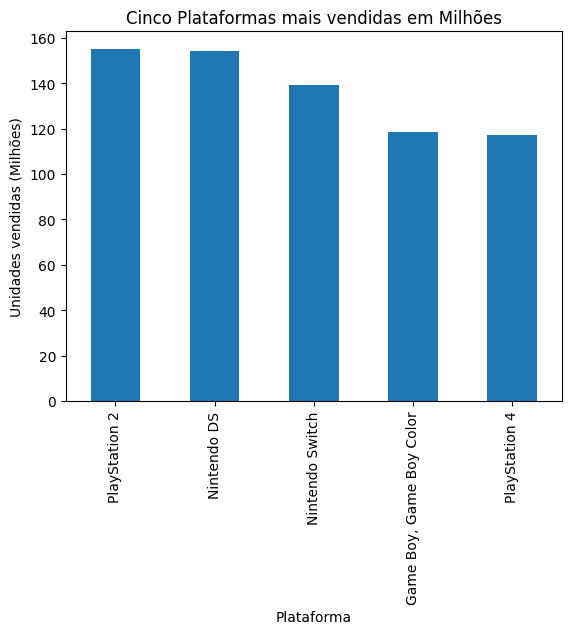

In [247]:
top5.plot(x='Plataforma', y='Unidades vendidas(Mi)', kind='bar', legend=False)
plt.xlabel('Plataforma')
plt.ylabel('Unidades vendidas (Milhões)')
plt.title('Cinco Plataformas mais vendidas em Milhões')
plt.show()

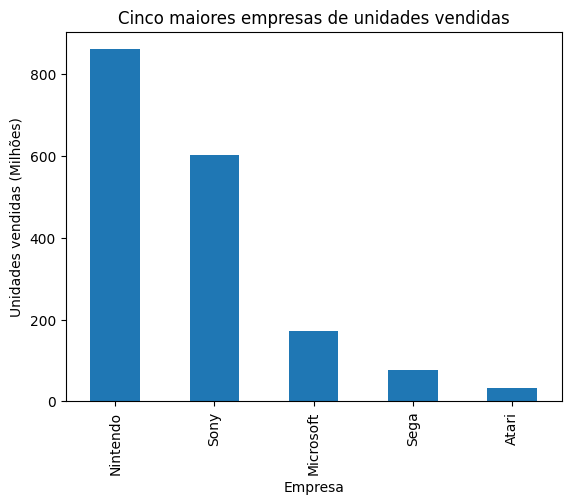

In [248]:
top5_empresas = df_empresas.head(5)
top5_empresas.plot(x='Empresa', y='Unidades vendidas(Mi)', kind='bar', legend=False)
plt.xlabel('Empresa')
plt.ylabel('Unidades vendidas (Milhões)')
plt.title('Cinco maiores empresas de unidades vendidas')
plt.show()

In [249]:
df_nintendo = df_consoles[df_consoles['Plataforma'].str.contains('Nintendo')]
df_nintendo = df_nintendo.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_nintendo

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,1,Nintendo DS,154.02,Nintendo,2004
1,2,Nintendo Switch,139.36,Nintendo,2017
2,11,Nintendo 3DS,75.94,Nintendo,2011
3,12,Nintendo Entertainment System,61.91,Nintendo,1983
4,15,Super Nintendo Entertainment System,49.10,Nintendo,1990
5,17,Nintendo 64,32.93,Nintendo,1996
6,20,Nintendo GameCube,21.74,Nintendo,2001


C:\Users\leand\AppData\Local\Temp\ipykernel_27396\1065673040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_nintendo, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

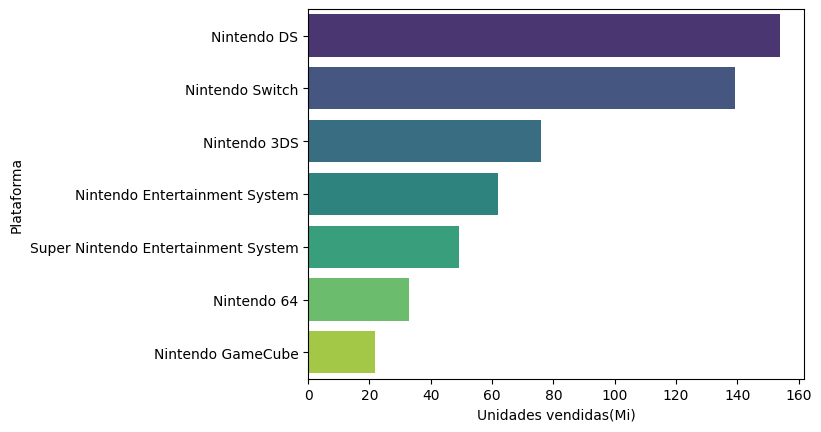

In [250]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_nintendo, palette='viridis')

In [251]:
df_sony = df_consoles[df_consoles['Empresa'].str.contains('Sony')].reset_index()
df_sony = df_sony.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_sony

,level_0,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,0,0,PlayStation 2,155.10,Sony,2000
1,1,4,PlayStation 4,117.20,Sony,2013
2,2,5,PlayStation,102.49,Sony,1994
3,3,7,PlayStation 3,87.40,Sony,2006
4,4,10,PlayStation Portable,80.82,Sony,2004
5,5,14,PlayStation 5,50.00,Sony,2020
6,6,24,PlayStation Vita,10.15,Sony,2011


C:\Users\leand\AppData\Local\Temp\ipykernel_27396\380412808.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sony, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

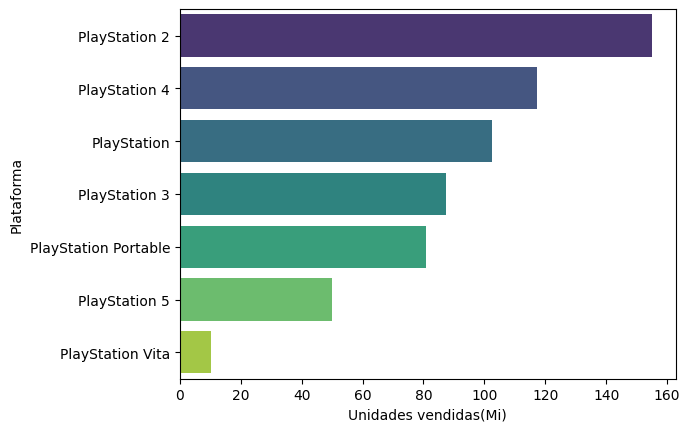

In [252]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sony, palette='viridis')

In [253]:
df_microsoft = df_consoles[df_consoles['Empresa'].str.contains('Microsoft')]
df_microsoft = df_microsoft.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_microsoft

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,8,Xbox 360,84.0,Microsoft,2005
1,13,Xbox One,51.0,Microsoft,2013
2,19,Xbox,24.0,Microsoft,2001
3,22,Xbox Series X/S,12.0,Microsoft,2020


C:\Users\leand\AppData\Local\Temp\ipykernel_27396\3471460425.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_microsoft, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

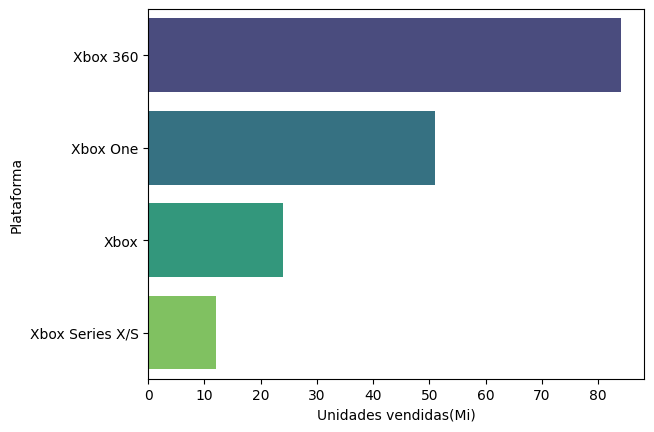

In [254]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_microsoft, palette='viridis')

In [255]:
df_sega = df_consoles[df_consoles['Plataforma'].str.contains('Sega')]
df_sega = df_sega.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_sega

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,23,Sega Game Gear,10.62,Sega,1990
1,27,Sega Saturn,9.26,Sega,1994
2,31,Sega Pico,3.40,Sega,1993


C:\Users\leand\AppData\Local\Temp\ipykernel_27396\3525571763.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sega, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

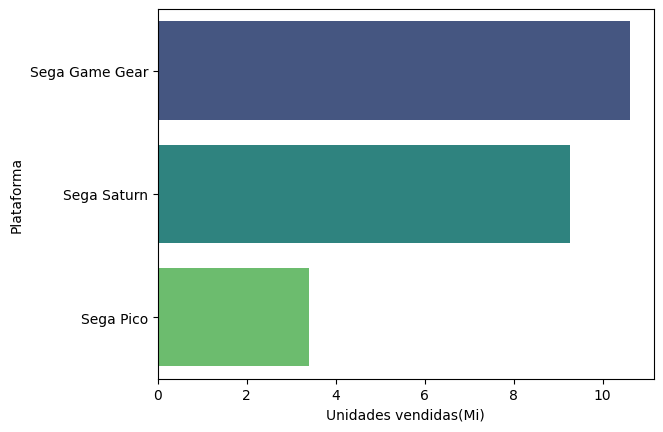

In [256]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sega, palette='viridis')

In [257]:
df_atari = df_consoles[df_consoles['Plataforma'].str.contains('Atari')]
df_atari = df_atari.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_atari

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,18,Atari 2600,30.0,Atari,1977
1,38,Atari Lynx,1.0,Atari,1989
2,39,Atari 5200,1.0,Atari,1982


C:\Users\leand\AppData\Local\Temp\ipykernel_27396\3050648930.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_atari, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

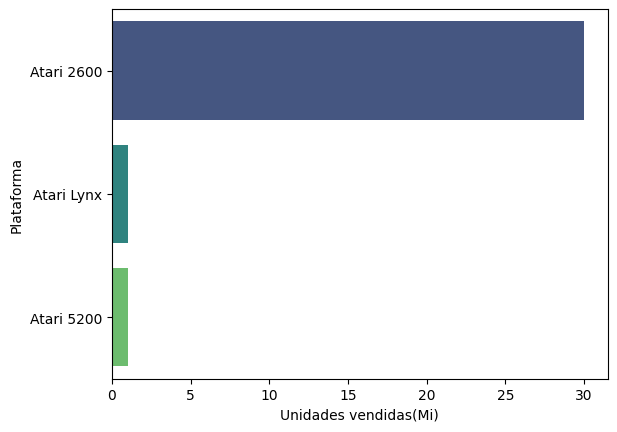

In [258]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_atari, palette='viridis')

In [259]:
from datetime import datetime

In [264]:
df_consoles['Lançamento[2]'] = df_consoles['Lançamento[2]'].str.replace('1989, 1998', '1989').astype('int64')


In [265]:
df_consoles['Idade'] = datetime.today().year - df_consoles['Lançamento[2]'].astype(int)
df_consoles

,Pos.,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2],Ref.,Idade
0,1,PlayStation 2,155.10,Sony,2000,[a],24
1,2,Nintendo DS,154.02,Nintendo,2004,[30],20
2,3,Nintendo Switch,139.36,Nintendo,2017,[31],7
3,4,"Game Boy, Game Boy Color",118.69,Nintendo,1989,[b],35
4,5,PlayStation 4,117.20,Sony,2013,[33],11
5,6,PlayStation,102.49,Sony,1994,[34],30
6,7,Wii,101.63,Nintendo,2006,[30],18
7,8,PlayStation 3,87.40,Sony,2006,[a],18
8,9,Xbox 360,84.00,Microsoft,2005,[c],19
9,10,Game Boy Advance,81.51,Nintendo,2001,[30],23


In [266]:
df_consoles['Vendas/Ano'] = df_consoles['Unidades vendidas(Mi)'] / df_consoles['Idade']
df_consoles = df
df_consoles

,Pos.,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2],Ref.,Idade,Vendas/Ano
0,1,PlayStation 2,155.10,Sony,2000,[a],24,6.462500
1,2,Nintendo DS,154.02,Nintendo,2004,[30],20,7.701000
2,3,Nintendo Switch,139.36,Nintendo,2017,[31],7,19.908571
3,4,"Game Boy, Game Boy Color",118.69,Nintendo,1989,[b],35,3.391143
4,5,PlayStation 4,117.20,Sony,2013,[33],11,10.654545
5,6,PlayStation,102.49,Sony,1994,[34],30,3.416333
6,7,Wii,101.63,Nintendo,2006,[30],18,5.646111
7,8,PlayStation 3,87.40,Sony,2006,[a],18,4.855556
8,9,Xbox 360,84.00,Microsoft,2005,[c],19,4.421053
9,10,Game Boy Advance,81.51,Nintendo,2001,[30],23,3.543913


C:\Users\leand\AppData\Local\Temp\ipykernel_27396\2200573142.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas/Ano', y='Plataforma', data=top10_consoles, palette='viridis')


<Axes: xlabel='Vendas/Ano', ylabel='Plataforma'>

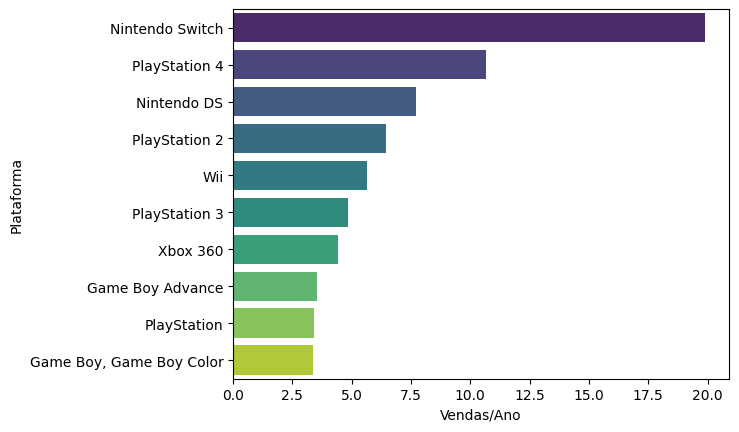

In [267]:
top10_consoles = df_consoles.head(10)
top10_consoles = top10_consoles.sort_values(by='Vendas/Ano', ascending=False).reset_index(
    
)
sns.barplot(x='Vendas/Ano', y='Plataforma', data=top10_consoles, palette='viridis')

C:\Users\leand\AppData\Local\Temp\ipykernel_27396\928950624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas/Ano', y='Empresa', data=top5_marcas, palette='viridis')


<Axes: xlabel='Vendas/Ano', ylabel='Empresa'>

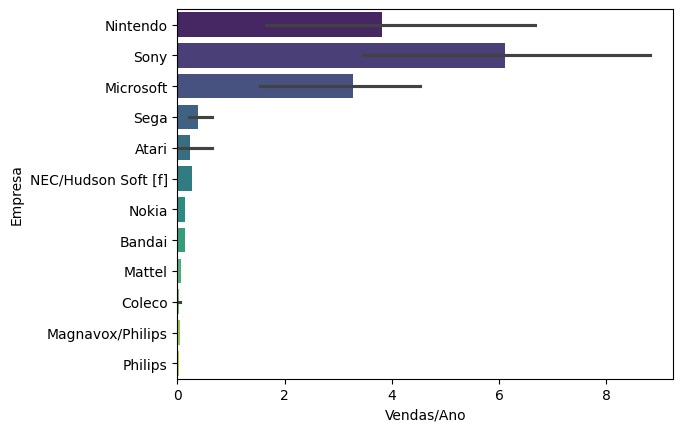

In [277]:
top5_marcas = df_consoles.sort_values(by='Empresa', ascending=False).reset_index()
top5_marcas = top5_marcas.sort_values(by='Vendas/Ano', ascending=False).reset_index()
sns.barplot(x='Vendas/Ano', y='Empresa', data=top5_marcas, palette='viridis')